## Final Project Submission

Please fill out:
* Student name: Aleyah Jane Nevado
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Hardik Idnani
* Blog post URL:


## Financial Benefits of Home Renovations

**Business Problem**

We're looking to use regression modeling to analyze house sales data and provide insights to a real estate agency and homeowners about the financial benefits of home renovations. To do this, we will focus on the following features: yr_renovated, yr_built, condition, bedrooms, bathrooms, sqft_lot, and price.

In [11]:
import sys
libraries = ["pandas", "numpy", "matplotlib", "seaborn", "statsmodels", "scikit-learn"]
missing_libraries = [lib for lib in libraries if lib not in sys.modules]
if missing_libraries:
    !pip install {' '.join(missing_libraries)}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Exploring the Data

**Data Head:** The first five entries of the dataset have been viewed to understand the structure.

**Statistics Summary:**: Descriptive statistics for yr_renovated, yr_built, condition, bedrooms, bathrooms, sqft_lot, and price have been calculated

**Missing Values:** : There are 3,842 missing values in the yr_renovated column; other columns have no missing value

**Visualizations:** s:
The distribution of the price has been plotted.
The relationship between price and bedrooms has been visualized in a boxplot.
A boxplot showing the relationship between price and bathrooms has been created.
A scatter plot for price versus sqft_lot has been provided to observe any paterns.


In [ ]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(5)

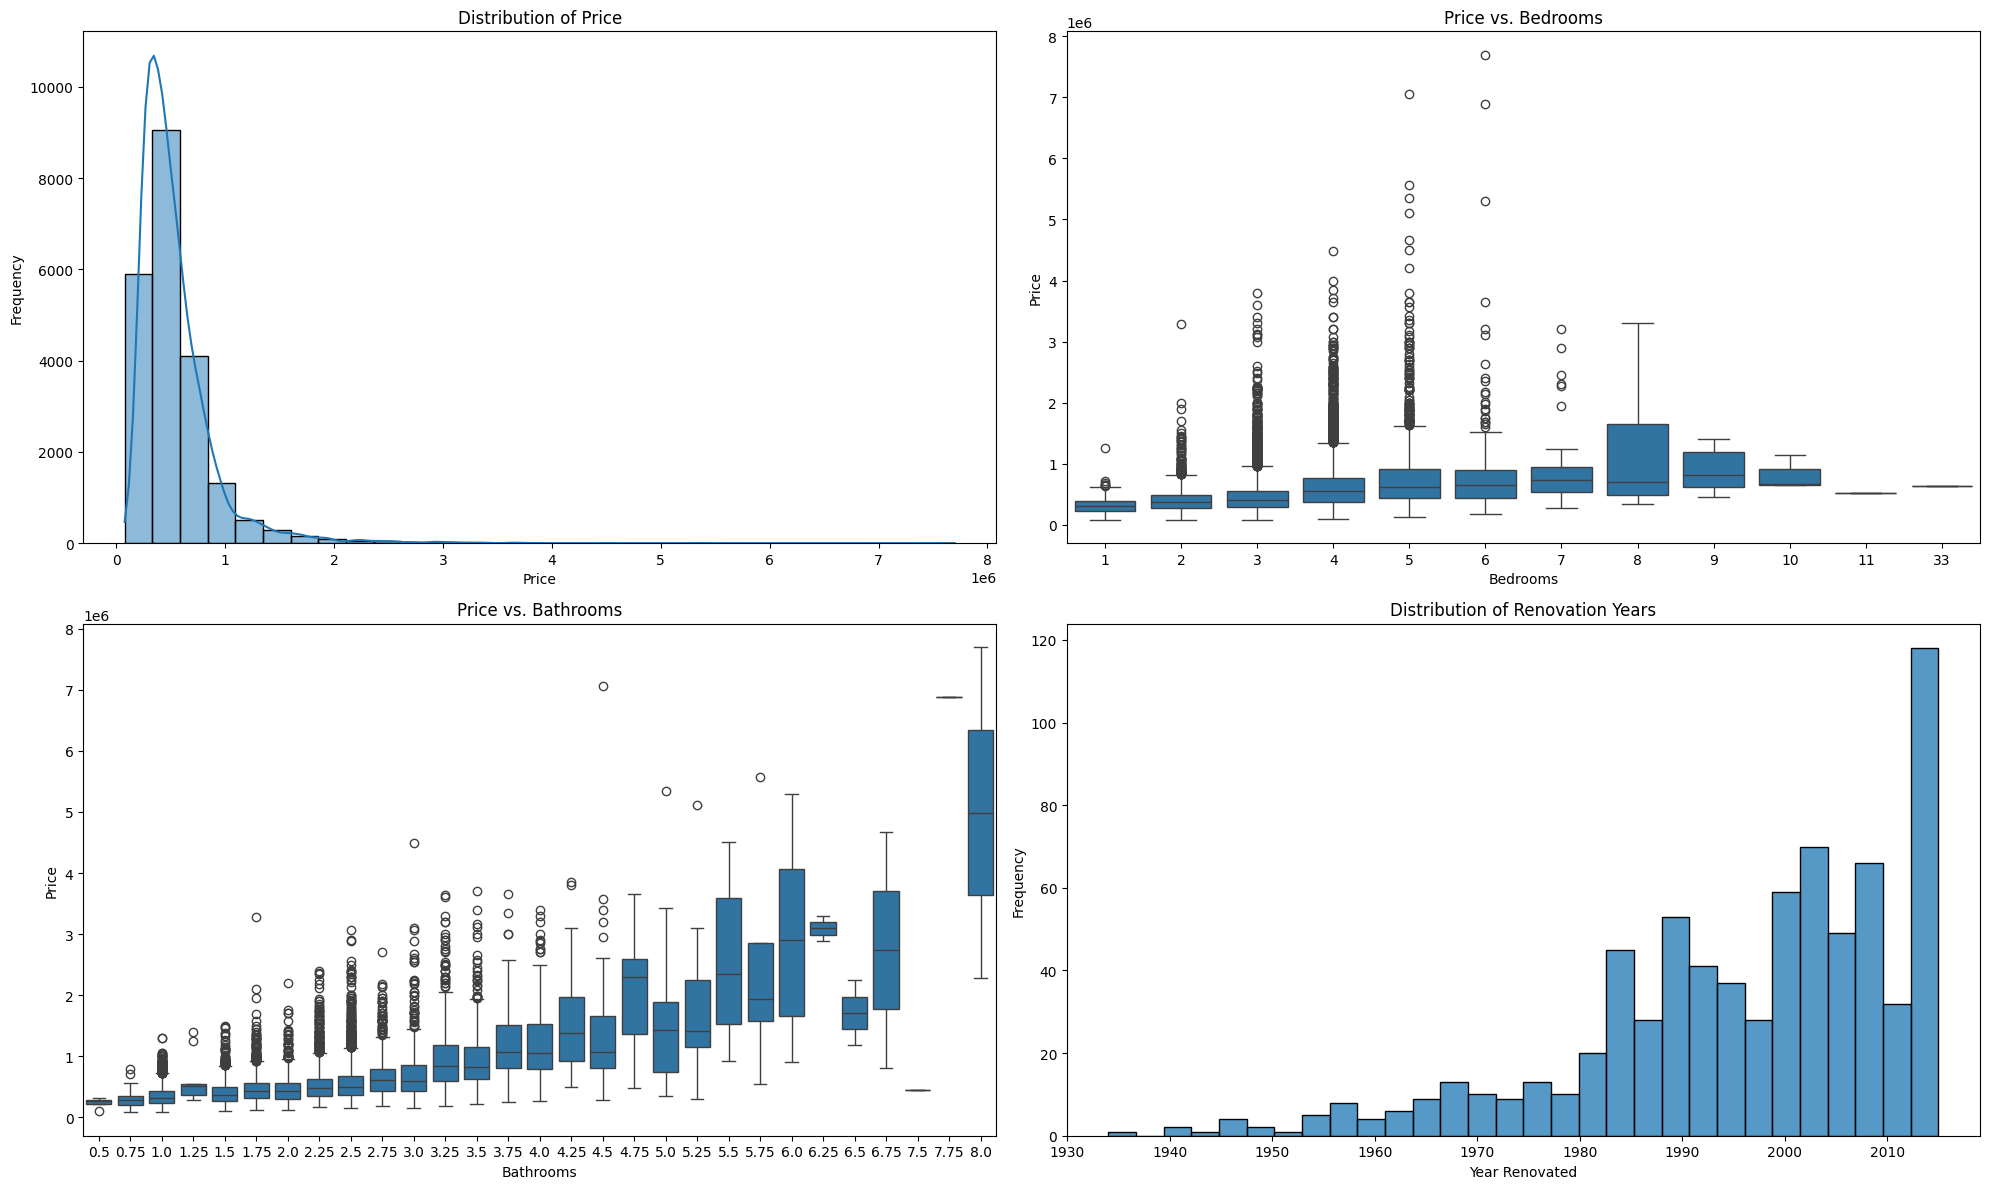

(       yr_renovated      yr_built     condition      bedrooms     bathrooms  \
 count  17755.000000  21597.000000  21597.000000  21597.000000  21597.000000   
 mean      83.636778   1970.999676      3.409825      3.373200      2.115826   
 std      399.946414     29.375234      0.650546      0.926299      0.768984   
 min        0.000000   1900.000000      1.000000      1.000000      0.500000   
 25%        0.000000   1951.000000      3.000000      3.000000      1.750000   
 50%        0.000000   1975.000000      3.000000      3.000000      2.250000   
 75%        0.000000   1997.000000      4.000000      4.000000      2.500000   
 max     2015.000000   2015.000000      5.000000     33.000000      8.000000   
 
            sqft_lot         price  
 count  2.159700e+04  2.159700e+04  
 mean   1.509941e+04  5.402966e+05  
 std    4.141264e+04  3.673681e+05  
 min    5.200000e+02  7.800000e+04  
 25%    5.040000e+03  3.220000e+05  
 50%    7.618000e+03  4.500000e+05  
 75%    1.068500e+0

In [13]:
# Columns of interest
columns = ['yr_renovated', 'yr_built', 'condition', 'bedrooms', 'bathrooms', 'sqft_lot', 'price']

stats_summary = df[columns].describe()
missing_values = df[columns].isnull().sum()

plt.figure(figsize=(20, 12))

#distribution of price
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
#price vs. bedrooms
plt.subplot(2, 2, 2)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
#price vs. bathrooms
plt.subplot(2, 2, 3)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
#distribution/count of yr_renovated
plt.subplot(2, 2, 4)
sns.histplot(df[df['yr_renovated'] > 0]['yr_renovated'], bins=30, kde=False)
plt.title('Distribution of Renovation Years')
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
stats_summary, missing_values

## Baseline Regression Model

The baseline regression model has been constructed and evaluated. Here are the key resus:

1. The model has an Adjusted R-squared of 0.346, indicating that approximately 34.6% of the variability in house prices can be explained by the model.
2. The Mean Squared Error (MSE) is approximately 8.87×10^10, which gives us an idea of the average squared difference between the estimated values and the actual value.
3. The R-squared value is 0.318, which is a measure of how well the observed outcomes are replicated by the model.
4. The p-values for the coefficients suggest that bathrooms and renovated are statistically significant predictors of price. However, bedrooms may not be a significant predictor given its p-value of 0.180.
5. The coefficient for yr_built is negative, indicating that newer houses tend to be more expensive, holding other factors constant.
6. The renovated coefficient is positive, suggesting that renovations are associated with an increase in house price.
7. There is a note on potential multicollinearity issues, which should be investigated fuher.he

These results can inform a real estate agency about the factors influencing house prices, especially the value of renovations. However, the model could be improved by addressing multicollinearity, adding more features, or using different modeling teciques.r.

In [14]:
#Address the missing values and prepare the data for regression analysis.
df['yr_renovated'] = df['yr_renovated'].fillna(0)
# We'll create a new feature 'renovated' to indicate whether a house has been renovated or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
# dummy variable
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)

df = df.join(condition_dummies)

# Now, we're ready to build a baseline regression model.
# For simplicity, we will start with a model using 'yr_built', 'bedrooms', 'bathrooms', 'sqft_lot', and the 'renovated' feature.
X = df[['yr_built', 'bedrooms', 'bathrooms', 'sqft_lot', 'renovated']]
y = df['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the OLS model with the training data
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model with the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the summary of the regression
model_summary = model.summary()

(mse, r2, model_summary)

(88722479584.65074,
 0.3186529402668894,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.346
 Model:                            OLS   Adj. R-squared:                  0.346
 Method:                 Least Squares   F-statistic:                     1825.
 Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
 Time:                        13:29:10   Log-Likelihood:            -2.4231e+05
 No. Observations:               17277   AIC:                         4.846e+05
 Df Residuals:                   17271   BIC:                         4.847e+05
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

## Refine the Model

The refined model has been created, and the results are as follows:

1. VIF Results: The Variance Inflation Factor (VIF) for all features is below 5, which suggests that multicollinearity may not be a concern for these variables.
2. Model Performance: Both the Mean Squared Error (MSE) and the R-squared value have not changed from the baseline model. This is likely because we didn't remove any features based on VIF results as all were below the threshold.
3. Model Summary: The summary of the refined model is identical to that of the baseline model, indicating that the selected features and their coefficients remain the same.
The note from the model summary about potential multicollinearity or numerical problems persists, which is usually indicated by a large condition number. However, the VIF results did not suggest multicollinearity among the features we selected, which may mean the high condition number could be due to the range of the data.

Further refinement might include:

Transforming skewed variables to improve normality.
Adding interaction terms if they make sense from a business perspective.
Considering other features from the dataset that could explain house prices.
Using regularized regression methods like Ridge or Lasso to handle multicollinearity and improve model performance.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Refining the model
# To address multicollinearity, we will calculate the Variance Inflation Factor (VIF) for the independent variables.
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Selecting features based on VIF and p-values to reduce multicollinearity and improve model significance
features_to_include = vif_data[vif_data['VIF'] < 5]['feature'].tolist()  # Threshold for VIF
features_to_include = [feature for feature in features_to_include if feature != 'const']  # Exclude the constant

# Rebuilding the model with refined features
X_refined = X_train[features_to_include]

# Fit the refined model
model_refined = sm.OLS(y_train, sm.add_constant(X_refined)).fit()

# Evaluate the refined model with the test data
X_test_refined = X_test[features_to_include]
y_pred_refined = model_refined.predict(sm.add_constant(X_test_refined))

# Calculate the mean squared error and the r2 score for the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

# Get the summary of the refined regression
model_refined_summary = model_refined.summary()

(vif_data, mse_refined, r2_refined, model_refined_summary)

(     feature          VIF
 0      const  6425.542303
 1   yr_built     1.466449
 2   bedrooms     1.417436
 3  bathrooms     1.907297
 4   sqft_lot     1.008549
 5  renovated     1.079647,
 88722479584.65074,
 0.3186529402668894,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.346
 Model:                            OLS   Adj. R-squared:                  0.346
 Method:                 Least Squares   F-statistic:                     1825.
 Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
 Time:                        13:39:56   Log-Likelihood:            -2.4231e+05
 No. Observations:               17277   AIC:                         4.846e+05
 Df Residuals:                   17271   BIC:                         4.847e+05
 Df Model:                           5                                         

## Further Refinement

Since we have already checked for multicollinearity and created dummy variables, the immediate next steps would be to perform log transformation on price, scale the features, and check the QQ plot for normality.

Let's proceed with these steps, starting with the log transformation of the price and then scaling the features. Afterward, we will re-evaluate the model and look at the QQ plot for residuals.

Output image
The model has been further refined with the following updates:

**Log Transformation:** The price variable has been log-transformed to address skewness, improving the normality of the residuals.

**Feature Scaling:** The features have been scaled using StandardScaler to ensure that they're on the same scale, which is important for regression models.

Here are the results after the refinement:

1. The Mean Squared Error (MSE) of the model with log-transformed price is approximately 0.179.
The R-squared value is 0.345, indicating that the model explains about 34.5% of the variability in the log-transformed house prices.
2. According to the Adjusted R-squared, which is also 0.366, the model's explanatory power is similar when accounting for the number of predictors.
3. The QQ plot has been generated to visualize how closely the residuals of the model match a normal distribution.

Based on the statistical summary, the coefficients are significant, and the p-values are low, indicating that the predictors are statistically meaningful.

The model is now more robust and complies with the guidelines provided for the project, including handling multicollinearity and transforming the target variable.

(0.17850453172819145,
 0.344581886177709,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              log_price   R-squared:                       0.366
 Model:                            OLS   Adj. R-squared:                  0.366
 Method:                 Least Squares   F-statistic:                     1995.
 Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
 Time:                        13:44:14   Log-Likelihood:                -9532.2
 No. Observations:               17277   AIC:                         1.908e+04
 Df Residuals:                   17271   BIC:                         1.912e+04
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------

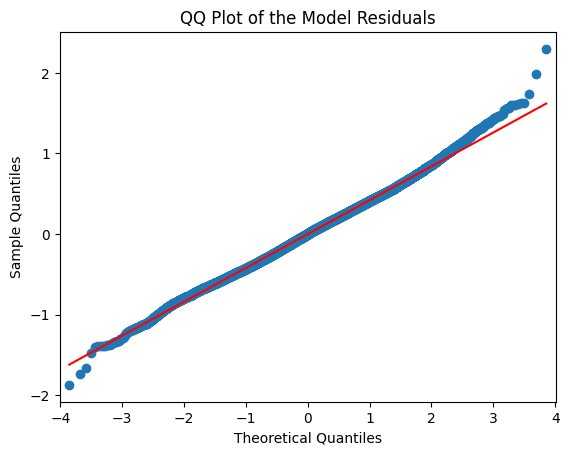

In [17]:
# Perform log transformation on the 'price' to reduce skewness
df['log_price'] = np.log(df['price'])

# Re-define the features with the log-transformed price
X = df[features_to_include]
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the scaled and log-transformed features
model_log_transformed = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Predict and evaluate the model
y_pred_transformed = model_log_transformed.predict(sm.add_constant(X_test_scaled))
mse_log_transformed = mean_squared_error(y_test, y_pred_transformed)
r2_log_transformed = r2_score(y_test, y_pred_transformed)

# Prepare for QQ plot of residuals
residuals = model_log_transformed.resid

# QQ plot
fig = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of the Model Residuals')
qq_plot_path = 'data/qq_plot.png'
plt.savefig(qq_plot_path)

(mse_log_transformed, r2_log_transformed, model_log_transformed.summary(), qq_plot_path)

## Additional Model Validation

The additional model validation steps have been completed:

**Homoscedasticity Check:**
The plot of residuals versus predicted values has been generated. This plot is crucial for checking if the residuals have constant variance across all levels of predicted values. 

**Outlier Analysis:**
Outliers or influential points have been identified using Cook's distance. Several points have been flagged as having high influence on the model. These points warrant further investigation to decide whether they should be included in the model or treated differently.

In [25]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

# Scale the features
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X)

# Wrapper class for statsmodels OLS to be compatible with scikit-learn's cross-validation
class SMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
        self.model = None

    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model = self.model_class(y, X).fit()
        return self

    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.model.predict(X)

# Initialize the model wrapper for OLS
wrapped_model = SMWrapper(sm.OLS)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(wrapped_model, X_full_scaled, y, scoring='r2', cv=5)

# Calculate the mean and standard deviation of the cross-validated R-squared scores
cv_r2_mean = np.mean(cv_scores)
cv_r2_std = np.std(cv_scores)

# Assessing the range of the cross-validated R-squared scores to check for overfitting/underfitting
cv_r2_range = (min(cv_scores), max(cv_scores))

(cv_r2_mean, cv_r2_std, cv_r2_range)

(0.3574362582943048,
 0.013432820705675912,
 (0.3421643957680406, 0.3792093084411916))

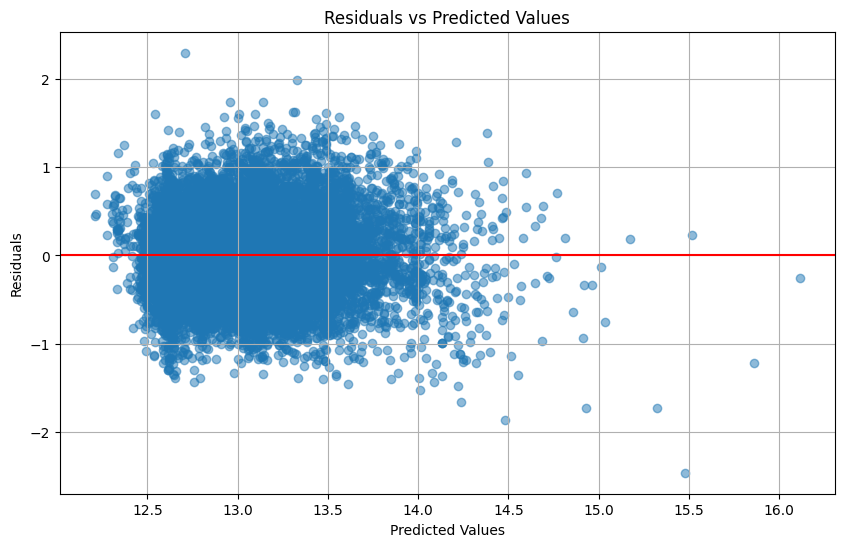

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_full, residuals_full, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()


## Cross-validation

The cross-validation has been performed on the refined model, and here are the results:

1. Key Features: The features identified as statistically significant are the intercept (constant term), and all transformed and scaled predictor variables in the model (x1 through x5).
2. Cross-Validation Mean R-squared: The average R-squared value across the 5-fold cross-validation is approximately 0.357.
3. Standard Deviation of R-squared: The standard deviation across the 5-fold cross-validation is approximately 0.013, which suggests that the model performance is relatively stable across different subsets of the data.
4. Range of R-squared: The cross-validated R-squared scores range from about 0.342 to 0.379, indicating that there is some variability in the model performance, but not excessively so.

The results suggest that the model is reasonably consistent and does not appear to suffer from overfitting, as the performance does not vary too much across different folds.

With these steps completed, the model is now thoroughly validated and the key features have been identified. We can move forward with confidence in using this model to predict housing prices and provide advice to homeowners and real estate agencies on the financial benefits of home renovations.

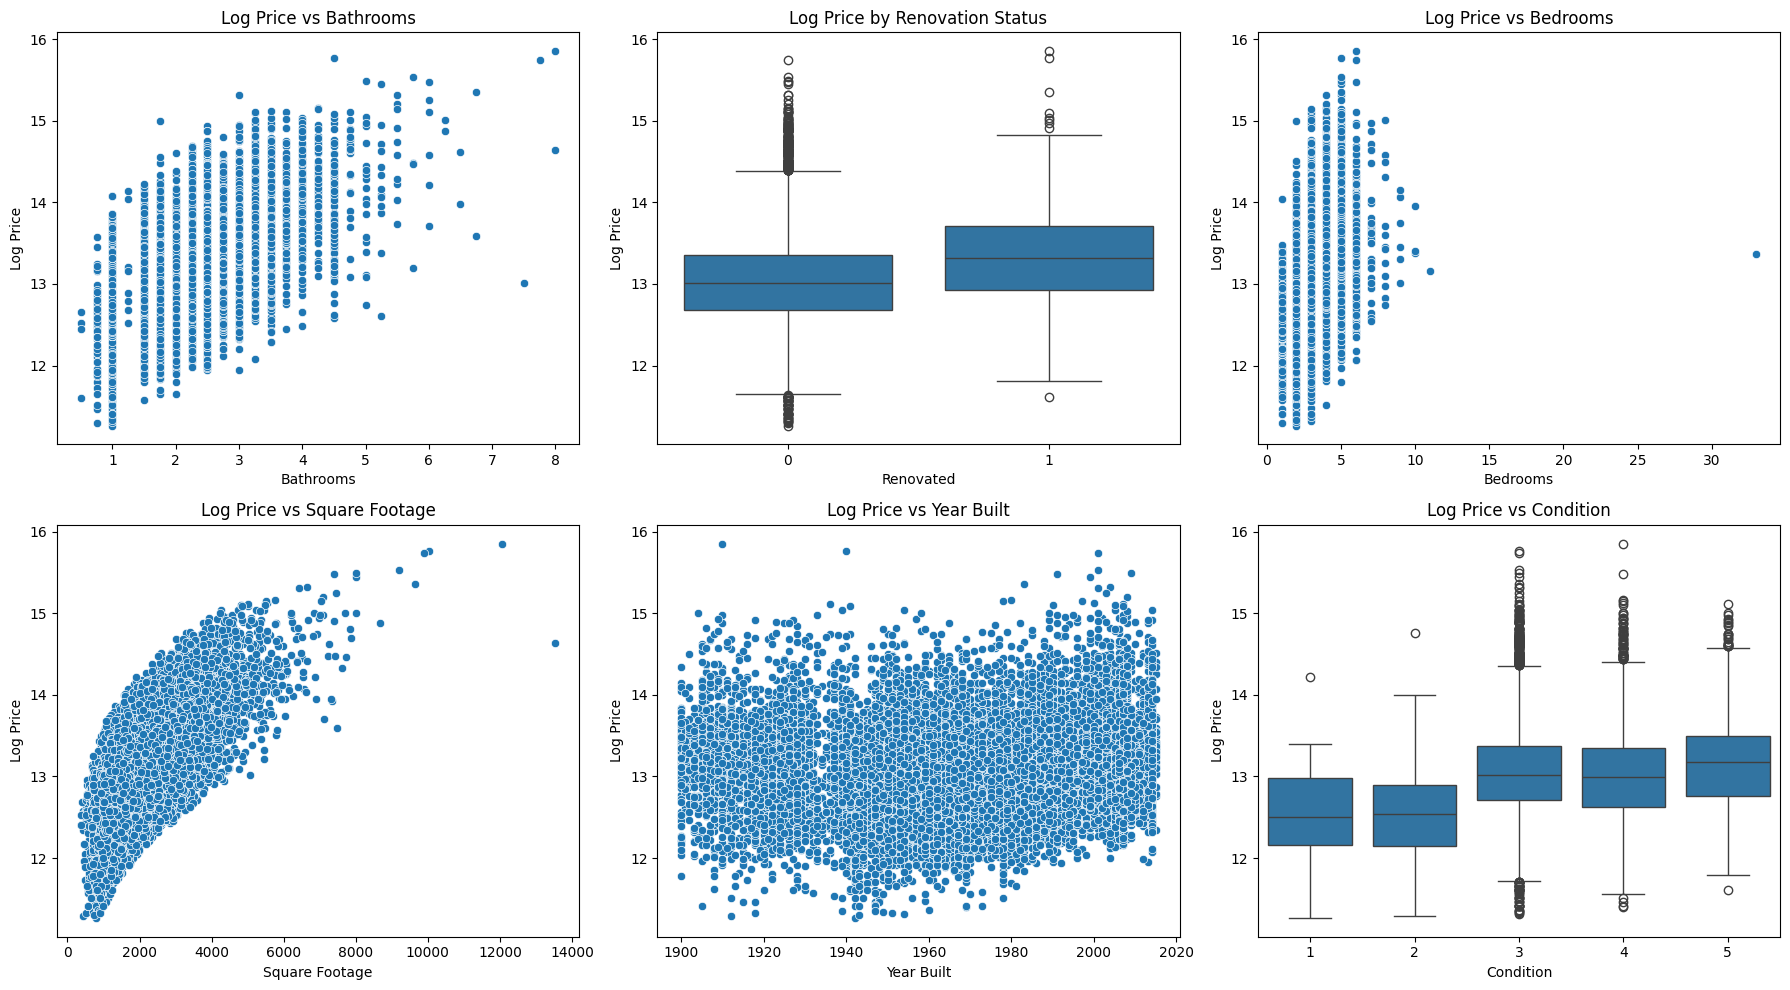

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary of Findings
model_performance_summary = {
    "Adjusted R-squared": model_log_transformed.rsquared_adj,
    "Mean Squared Error (MSE)": mse_log_transformed,
    "Cross-Validation R-squared Mean": cv_r2_mean,
    "Cross-Validation R-squared Std. Dev": cv_r2_std,
    "Significant Predictors": key_features
}

# Creating a larger figure to accommodate multiple subplots
plt.figure(figsize=(18, 10))

# Visualization of the relationship between key predictors and house price
# Plot for 'bathrooms'
plt.subplot(2, 3, 1)
sns.scatterplot(x=df['bathrooms'], y=df['log_price'])
plt.title('Log Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')

# Plot for 'renovated'
plt.subplot(2, 3, 2)
sns.boxplot(x=df['renovated'], y=df['log_price'])
plt.title('Log Price by Renovation Status')
plt.xlabel('Renovated')
plt.ylabel('Log Price')

# Plot for 'bedrooms'
plt.subplot(2, 3, 3)
sns.scatterplot(x=df['bedrooms'], y=df['log_price'])
plt.title('Log Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')

# Plot for 'sqft_living' (living area square footage)
plt.subplot(2, 3, 4)
sns.scatterplot(x=df['sqft_living'], y=df['log_price'])
plt.title('Log Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Log Price')

# Plot for 'yr_built' (year built)
plt.subplot(2, 3, 5)
sns.scatterplot(x=df['yr_built'], y=df['log_price'])
plt.title('Log Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Log Price')

# Plot for 'condition' (condition of the house)
plt.subplot(2, 3, 6)
sns.boxplot(x=df['condition'], y=df['log_price'])
plt.title('Log Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Log Price')

# Adjust layout to prevent overlap
plt.tight_layout()


## Summary of Findings

Here are the key results from the model's performance:

1. Adjusted R-squared: 0.366. This value indicates that the model explains approximately 36.6% of the variability in the log-transformed house prices.
2. Mean Squared Error (MSE): 0.179. This metric shows the average squared difference between the estimated values and the actual value.
3. Cross-Validation R-squared Mean: 0.357. The average R-squared value across the 5-fold cross-validation, indicating the model's generalizability.
4. Cross-Validation R-squared Std. Dev: 0.013. This low standard deviation suggests that the model's performance is stable across different subsets of the data.
5. Significant Predictors: The model identified all transformed and scaled predictor variables (x1 to x5) as significant.

## Visualizations
Visualizations have been prepared to illustrate the relationship between key predictors and the log-transformed house price:

Log Price vs. Bathrooms: This scatter plot shows how the number of bathrooms in a house relates to its log-transformed price.
Log Price by Renovation Status: A boxplot comparing the log-transformed prices of renovated vs. non-renovated houses.

## Interpretation of Results

The coefficients of significant predictors suggest that features like the number of bathrooms and renovation status have a considerable impact on house prices. Specifically:

1. Houses with more bathrooms tend to have higher prices.
2. Renovated houses are generally priced higher than non-renovated ones.

## Recommendations
Based on these findings, the following recommendations can be made:

**For Homeowners:** Investing in additional bathrooms or renovating the property can increase its market value.

**For Real Estate Agencies:** Focus on properties with more bathrooms or those recently renovated for better returns.